## **Data Understanding**

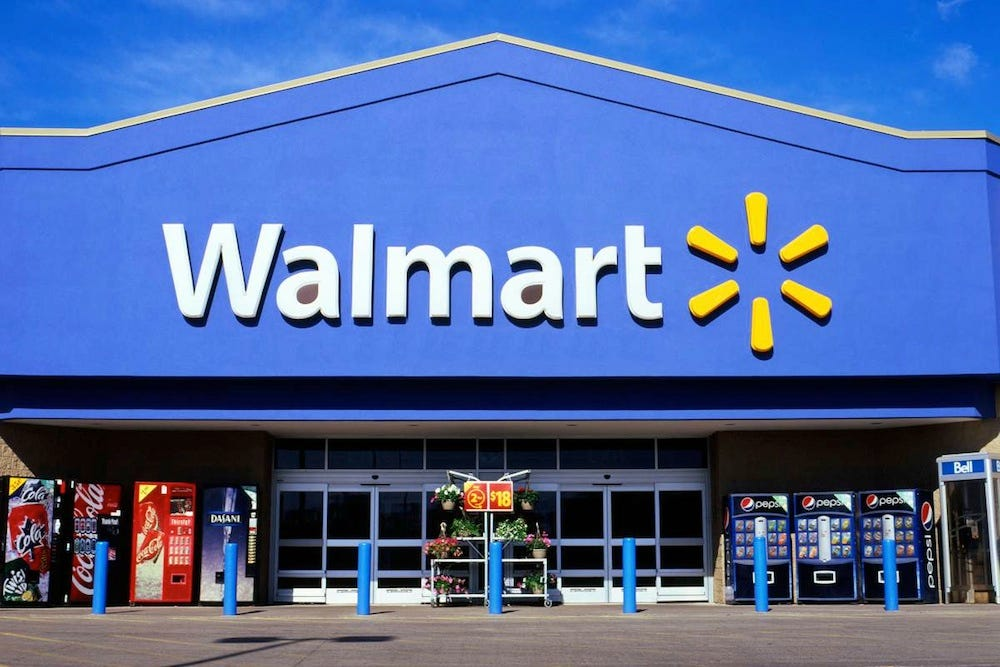

About Dataset

Walmart is a globally recognized retail giant, renowned for offering a wide range of products at competitive prices, and providing a convenient shopping experience for millions of customers worldwide.

Analyzing this dataset offers valuable insights into Walmart's customer base and purchasing behavior. It reveals details about customer demographics, product preferences, and spending patterns. This comprehensive dataset is a valuable resource for understanding various aspects of Walmart's operations, such as marketing strategies, customer segmentation, and product demand. It can enhance strategic decision-making in areas like inventory management, targeted marketing, and customer relationship management.

The datset contains the following columns:


    User_ID: User ID

    Product_ID: Product ID

    Gender: Sex of User

    Age: Age in bins

    Occupation: Occupation(Masked)

    City_Category: Category of the City (A,B,C)

    StayInCurrentCityYears: Number of years stay in current city

    Marital_Status: Marital Status

    ProductCategory: Product Category (Masked)

    Purchase: Purchase Amount


URL: https://www.kaggle.com/code/tsailiehkao/walmart-visualization

## **Data Download**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['Walmart Visualization'] = '/content/drive/MyDrive/Colab Notebooks/kaggle'

In [ ]:
!kaggle datasets download -d devarajv88/walmart-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset
License(s): other
  0% 0.00/4.80M [00:00<?, ?B/s]
100% 4.80M/4.80M [00:00<00:00, 74.7MB/s]


In [ ]:
import zipfile

# Define the path to your zip file
file_path = '/content/walmart-sales-dataset.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/kaggle')  # Replace 'destination_folder' with your desired folder

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## **Explore and Clean Data**

In [ ]:
# Checks the type of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Convert some columns to suitable type
df['User_ID'] = df['User_ID'].astype('object')
df['Occupation'] = df['Occupation'].astype('object')
df['Marital_Status'] = df['Marital_Status'].astype('object')
df['Product_Category'] = df['Product_Category'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [ ]:
# Checks missing value
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
# Checks the amount of column and row
df.shape

(550068, 10)

In [ ]:
# Checking the range and value in numercial column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
# See if the object column has weird representation
df.describe(include= 'object').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


In [ ]:
df.dtypes

,0
User_ID,object
Product_ID,object
Gender,object
Age,object
Occupation,object
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,object
Product_Category,object
Purchase,int64


## **Exploration Data Analyst EDA**

1. Which product category is the best seller for each gender?

In [ ]:
best_gen_product = df.groupby(['Gender', 'Product_Category'])['Purchase'].sum().reset_index()
best_m_product = best_gen_product[best_gen_product['Gender'] == 'M']
best_f_product = best_gen_product[best_gen_product['Gender'] == 'F']
print('The top 5 best seller product category for men')
print(best_m_product.sort_values('Purchase', ascending= False).head(5))
print('The top 5 best seller product category for women')
print(best_f_product.sort_values('Purchase', ascending= False).head(5))

The top 5 best seller product category for men
   Gender  Product_Category    Purchase
20      M                 1  1572382609
24      M                 5   677177151
27      M                 8   602636323
25      M                 6   253046186
21      M                 2   203972569
The top 5 best seller product category for women
  Gender  Product_Category   Purchase
0      F                 1  337631145
4      F                 5  264658078
7      F                 8  251682476
5      F                 6   71104116
1      F                 2   64543617


<ipython-input-52-3ed2fdfcd7cc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= best_gen_product, x= 'Gender', y= 'Purchase', ci= None, palette= {'M':'#3C55B0', 'F': '#EAE476'})
<ipython-input-52-3ed2fdfcd7cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= best_gen_product, x= 'Gender', y= 'Purchase', ci= None, palette= {'M':'#3C55B0', 'F': '#EAE476'})


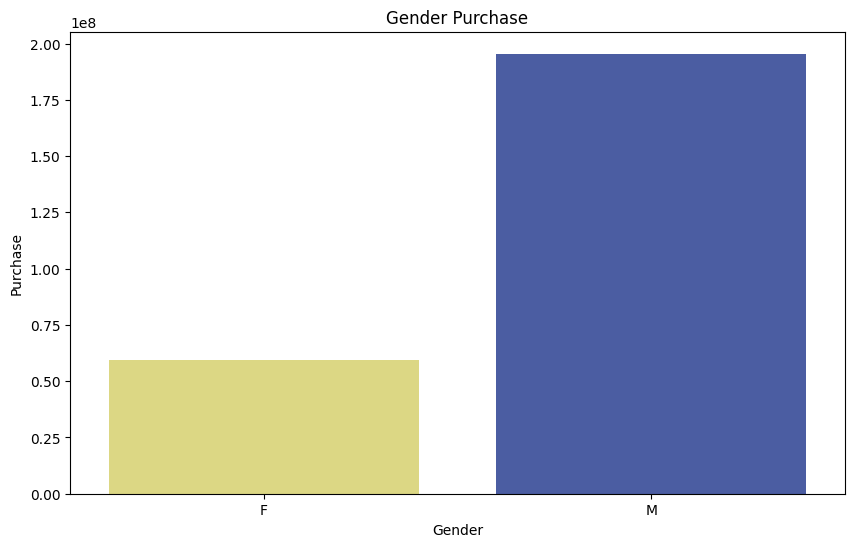

In [ ]:
plt.figure(figsize= (10,6))
sns.barplot(data= best_gen_product, x= 'Gender', y= 'Purchase', ci= None, palette= {'M':'#3C55B0', 'F': '#EAE476'})
plt.title('Gender Purchase')
plt.show()

<ipython-input-44-e910498711b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_m_product, x='Product_Category', y='Purchase', order=best_m_product.sort_values('Purchase', ascending=False)['Product_Category'], palette='crest')


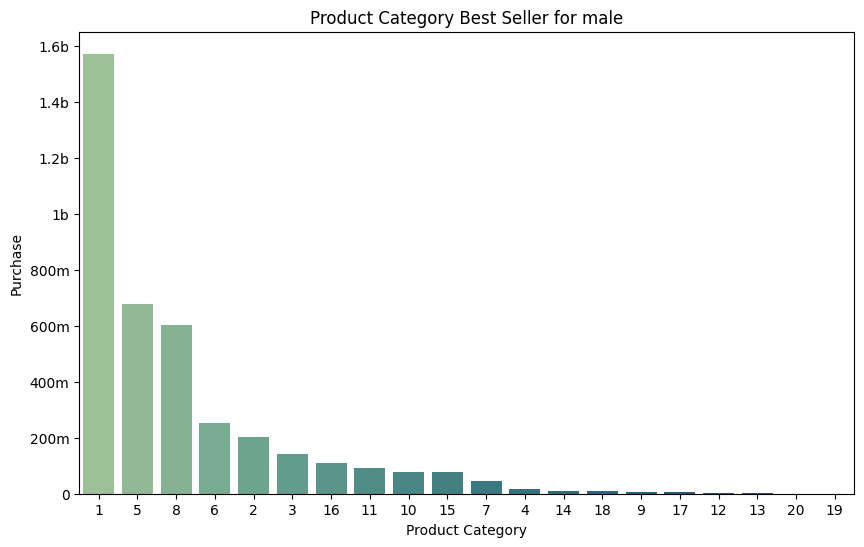

<ipython-input-44-e910498711b1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_f_product, x='Product_Category', y='Purchase', order=best_f_product.sort_values('Purchase', ascending=False)['Product_Category'], palette='flare')


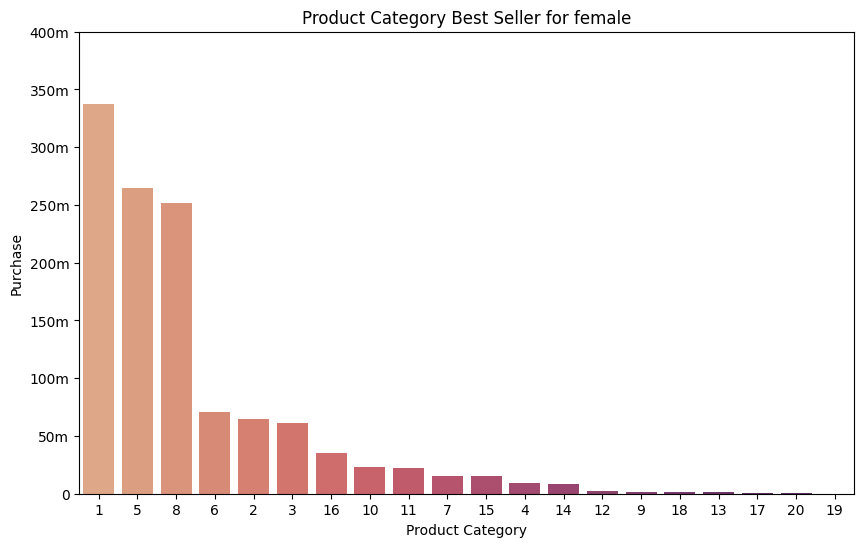

In [ ]:
plt.figure(figsize= (10, 6))
sns.barplot(data=best_m_product, x='Product_Category', y='Purchase', order=best_m_product.sort_values('Purchase', ascending=False)['Product_Category'], palette='crest')
plt.title('Product Category Best Seller for male')
plt.xlabel('Product Category')
plt.ylabel('Purchase')
mtick_val = [0, 200000000, 400000000, 600000000, 800000000, 1000000000, 1200000000, 1400000000, 1600000000]
mtick_lab = ['0', '200m', '400m', '600m', '800m', '1b', '1.2b', '1.4b', '1.6b']
plt.yticks(mtick_val, mtick_lab)
plt.show()

plt.figure(figsize= (10, 6))
sns.barplot(data=best_f_product, x='Product_Category', y='Purchase', order=best_f_product.sort_values('Purchase', ascending=False)['Product_Category'], palette='flare')
plt.title('Product Category Best Seller for female')
plt.xlabel('Product Category')
plt.ylabel('Purchase')
ftick_val = [0, 50000000, 100000000, 150000000, 200000000, 250000000, 300000000, 350000000, 400000000]
ftick_lab = ['0', '50m', '100m', '150m', '200m', '250m', '300m', '350m', '400m']
plt.yticks(ftick_val, ftick_lab)
plt.show()

The graph shows that product categories 1, 5, and 8 are top sellers for both groups. This suggests that there may be no significant difference in product category preferences between males and females, or that these categories represent essential products used by both genders.

The product of male with the highest sales volume is 1
     Gender  Product_Category Product_ID  Purchase
3397      M                 1  P00025442  22130146
3493      M                 1  P00110742  20957437
3617      M                 1  P00184942  19511115
3450      M                 1  P00057642  19305959
3499      M                 1  P00112142  19217614


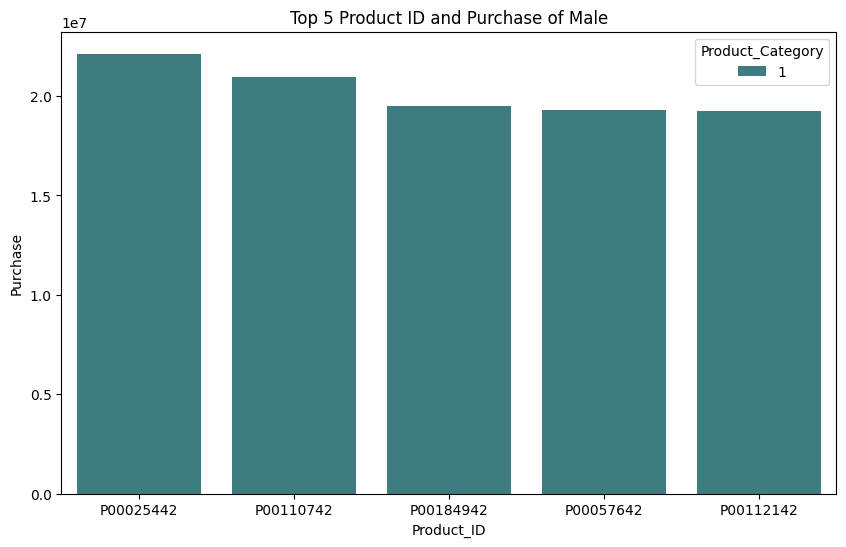

In [ ]:
male_product_rank = df.groupby(['Gender', 'Product_Category', 'Product_ID'])['Purchase'].sum().reset_index()
male_product_rank = male_product_rank[male_product_rank['Gender'] == 'M']
male_product_rank = male_product_rank.sort_values('Purchase', ascending= False).head(5)
print(f'The product of male with the highest sales volume is {male_product_rank.iloc[0, 1]}')
print(male_product_rank)
# Plot the Chart
plt.figure(figsize= (10,6))
sns.barplot(data= male_product_rank, x= 'Product_ID', y= 'Purchase', palette= 'crest', hue= 'Product_Category')
plt.title('Top 5 Product ID and Purchase of Male')
plt.show()

These are the top 5 products that men like to purchase, all of which are from product category number 1, which is correlated with the best-selling product category for men.

The product of female with the highest sales volume is 16
     Gender  Product_Category Product_ID  Purchase
3286      F                16  P00255842   6858212
1714      F                 6  P00059442   6149536
123       F                 1  P00110842   6041427
30        F                 1  P00025442   5865020
122       F                 1  P00110742   5764872


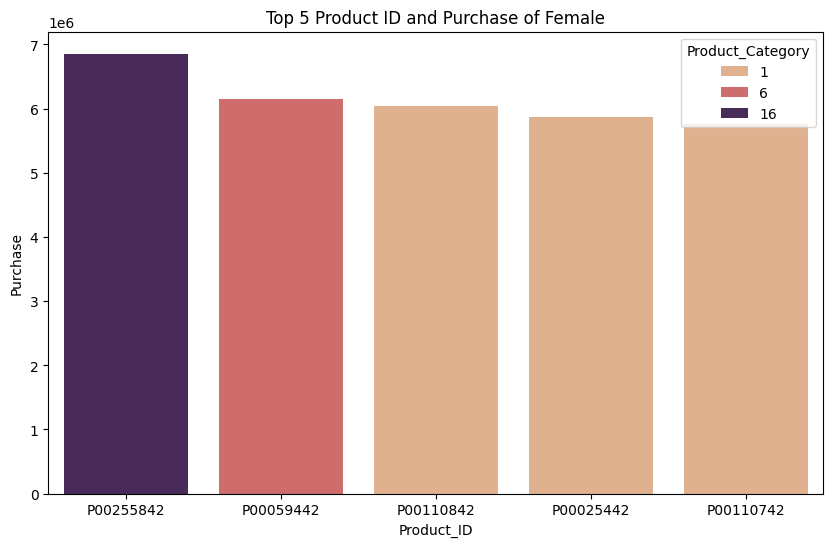

In [ ]:
female_product_rank = df.groupby(['Gender', 'Product_Category', 'Product_ID'])['Purchase'].sum().reset_index()
female_product_rank = female_product_rank[female_product_rank['Gender'] == 'F']
female_product_rank = female_product_rank.sort_values('Purchase', ascending= False).head(5)
print(f'The product of female with the highest sales volume is {female_product_rank.iloc[0, 1]}')
print(female_product_rank)
# Plot the Chart
plt.figure(figsize= (10,6))
sns.barplot(data= female_product_rank, x= 'Product_ID', y= 'Purchase', palette= 'flare', hue= 'Product_Category')
plt.title('Top 5 Product ID and Purchase of Female')
plt.show()

Surprisingly, the best-selling products among female customers are from product categories 16 (P00255842) and 6 (P00059442), rather than product category 1. This suggests that factors other than overall popularity influence female purchasing decisions. While product categories 1, 5, and 8 are generally popular among females, these specific products may have unique attributes or appeal that drive their higher sales.



---



2. Which city category has the highest sales volume compared to other city categories?

In [ ]:
city_cate_purchase = df.groupby('City_Category')['Purchase'].sum().reset_index()
city_cate_sorted = city_cate_purchase.sort_values('Purchase', ascending= False)
print(city_cate_sorted)
print(f'The city category with the highest sales volume is {city_cate_sorted.iloc[0, 0]}')

  City_Category    Purchase
1             B  2115533605
2             C  1663807476
0             A  1316471661
The city category with the highest sales volume is B


<ipython-input-48-b2070b507a78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= city_cate_sorted, x= 'City_Category', y= 'Purchase', palette= 'crest')


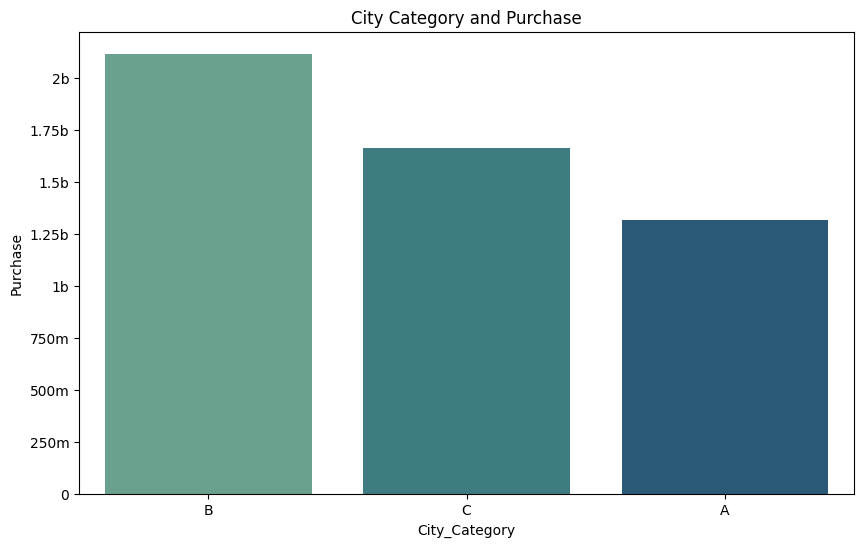

In [ ]:
plt.figure(figsize= (10,6))
sns.barplot(data= city_cate_sorted, x= 'City_Category', y= 'Purchase', palette= 'crest')
plt.title('City Category and Purchase')
ctick_val = [0, 250000000, 500000000, 750000000, 1000000000, 1250000000, 1500000000, 1750000000, 2000000000]
ctick_lab = ['0', '250m', '500m', '750m', '1b', '1.25b', '1.5b', '1.75b', '2b']
plt.yticks(ctick_val, ctick_lab)
plt.show()

The graph reveals that city category 'B,' with a purchase volume of 2,115,533,605, is the highest-spending category at Walmart. This is nearly twice the volume of city category 'A,' which is 1,316,471,661.



---



3. After identifying the best product category and city category, how many customers are married or single? This factor could influence whether people buy more or not.

   Marital_Status    Purchase
0               0  3008927447
1               1  2086885295


<ipython-input-86-515f16b16d4f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= cus_get_married, x= 'Marital_Status', y= 'Purchase', palette= 'crest')


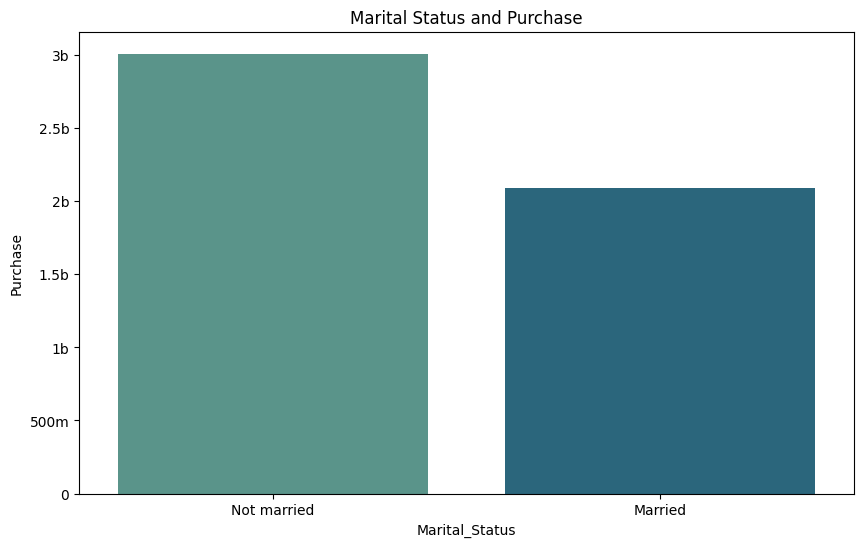

In [ ]:
cus_get_married = df.groupby('Marital_Status')['Purchase'].sum().reset_index()
print(cus_get_married)

plt.figure(figsize= (10,6))
sns.barplot(data= cus_get_married, x= 'Marital_Status', y= 'Purchase', palette= 'crest')
plt.title('Marital Status and Purchase')
plt.xticks([0, 1], ['Not married', 'Married'])
matick_val = [0, 500000000, 1000000000, 1500000000, 2000000000, 2500000000, 3000000000]
matick_lab = ['0', '500m', '1b', '1.5b', '2b', '2.5b', '3b']
plt.yticks(matick_val, matick_lab)
plt.show()

This chart shows that most Walmart customers are single, rather than married.

   Marital_Status City_Category    Purchase
0               0             A   818350626
1               0             B  1250605488
2               0             C   939971333
3               1             A   498121035
4               1             B   864928117
5               1             C   723836143


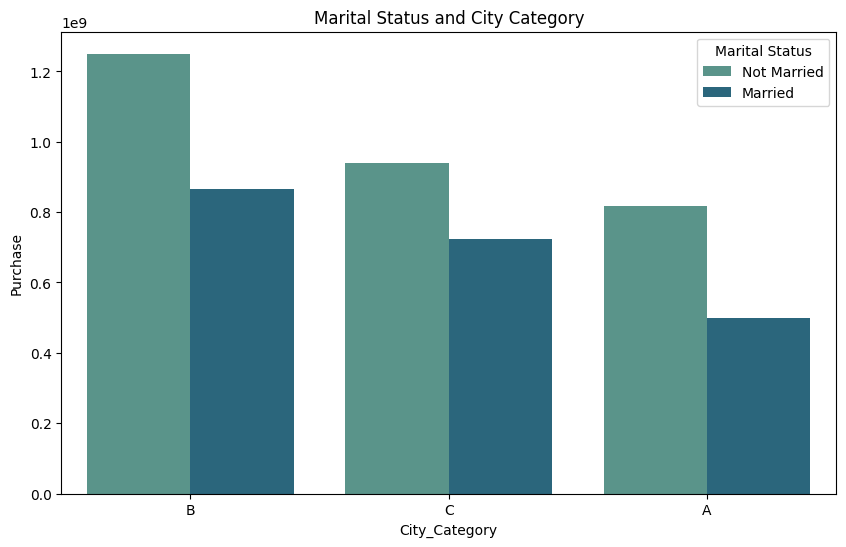

In [ ]:
cus_married_city = df.groupby(['Marital_Status', 'City_Category'])['Purchase'].sum().reset_index()
print(cus_married_city)

plt.figure(figsize= (10,6))
category_order = ['B', 'C', 'A']
ax = sns.barplot(data= cus_married_city, x= 'City_Category', y= 'Purchase', hue= 'Marital_Status',
            palette= 'crest', order= category_order, hue_order=[0, 1])

plt.title('Marital Status and City Category')

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Not Married', 'Married'], title= 'Marital Status')

plt.show()

This chart emphasizes that although we separate into each city category, single individuals  still  make more purchases at Walmart than married individuals.

4. How do purchasing habits differ across city categories (A, B, C), and what product categories are most popular in each?

<Figure size 1000x500 with 0 Axes>

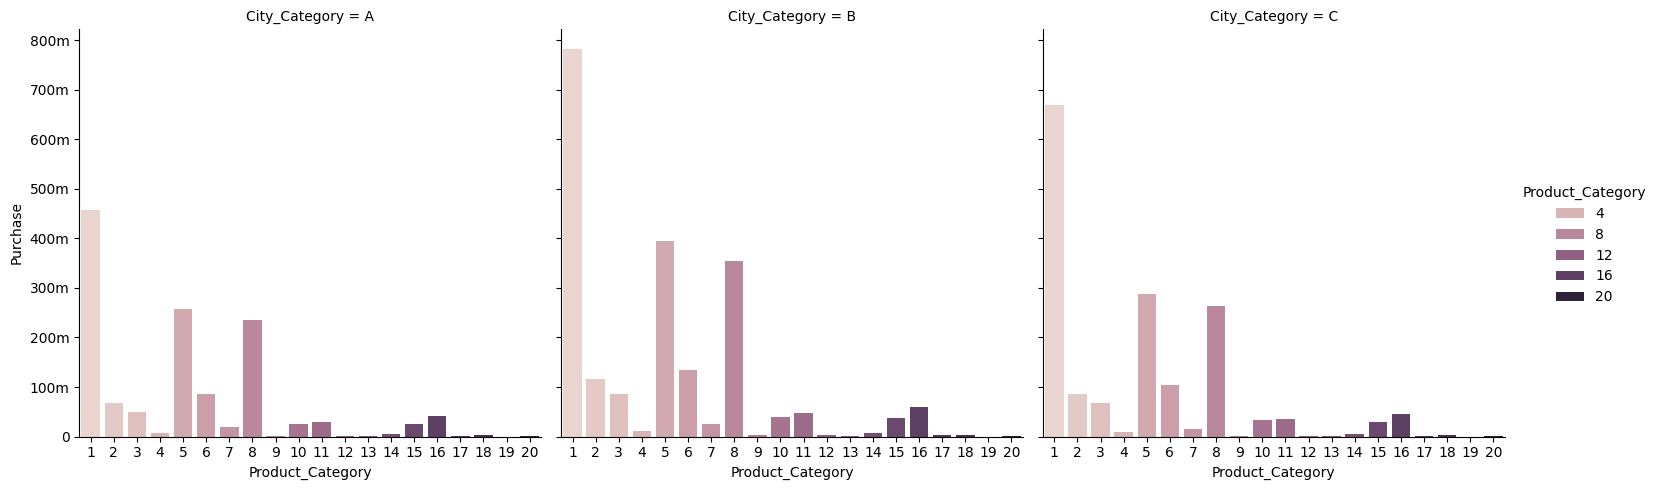

In [ ]:
city_category_purchase = df.groupby(['City_Category', 'Product_Category'])['Purchase'].sum().reset_index()

#Plot the chart
plt.figure(figsize= (10, 5))
sns.catplot(data= city_category_purchase, x= 'Product_Category', col= 'City_Category', y= 'Purchase', hue= 'Product_Category', kind= 'bar')

tick_val = [0, 100000000, 200000000, 300000000, 400000000, 500000000, 600000000, 700000000, 800000000]
tick_lab = ['0', '100m', '200m', '300m', '400m', '500m', '600m', '700m', '800m']
plt.yticks(tick_val, tick_lab)

plt.show()

City category 'B' has the highest frequency of purchasers, with category 1 being the most popular among all others, not just for city 'B' but across all city categories.



---



5. What is the most common age of Walmart customers, and what are their occupations?

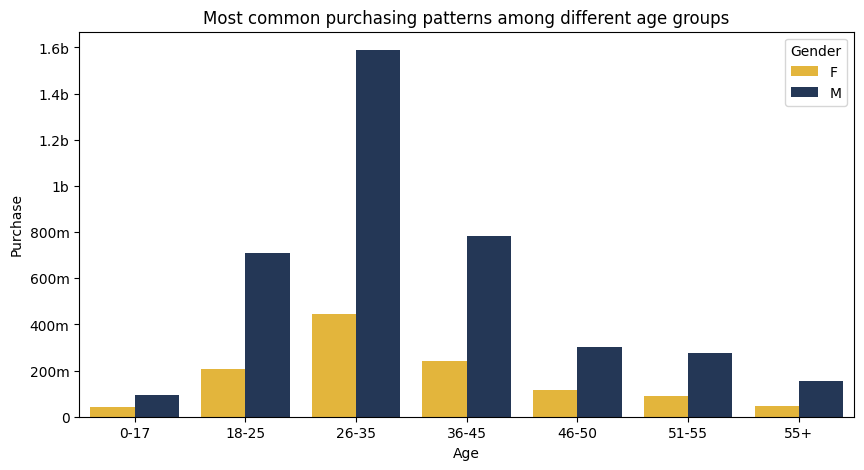

In [ ]:
# Group by Age and Gender, then sum purchases
age_gender_purchase = df.groupby(['Age', 'Gender'])['Purchase'].sum().reset_index()

# plot bar chart
plt.figure(figsize= (10, 5))
sns.barplot(x='Age', y='Purchase', hue='Gender', data= age_gender_purchase, palette= {"M":"#1c355e", "F":"#ffc220"})
plt.title('Most common purchasing patterns among different age groups')
tick_val = [0, 200000000, 400000000, 600000000, 800000000, 1000000000, 1200000000, 1400000000, 1600000000]
tick_lab = ['0', '200m', '400m', '600m', '800m', '1b', '1.2b', '1.4b', '1.6b']
plt.yticks(tick_val, tick_lab)
plt.show()

The age group of 26-35 is the most frequent purchaser at Walmart, with males purchasing more than females.

The occupation with the highest sales volume is 0


<ipython-input-85-973c8631498a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= cus_26_35_sorted, x= 'Occupation', y= 'Purchase', palette= 'crest', order= cus_26_35_sorted['Occupation'])


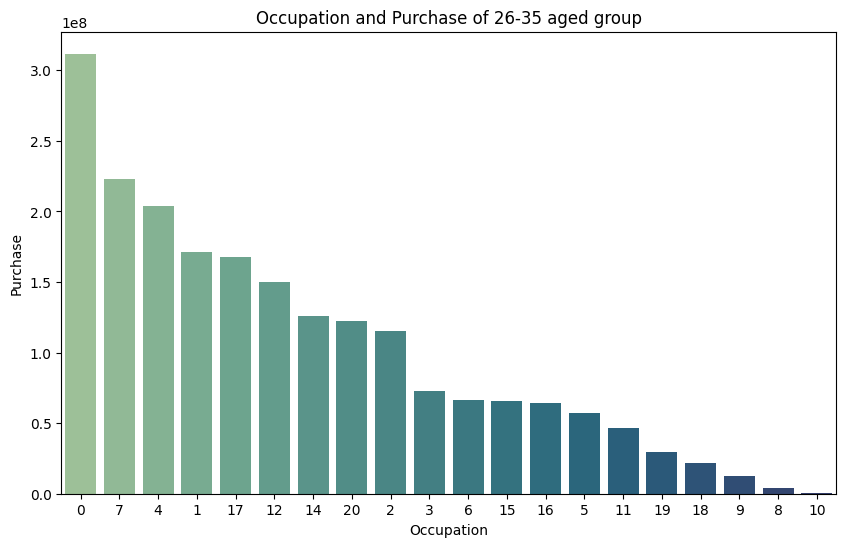

In [ ]:
cus_age_26_35 = df[df['Age'] == '26-35']
cus_26_35_group = cus_age_26_35.groupby('Occupation')['Purchase'].sum().reset_index()
cus_26_35_sorted = cus_26_35_group.sort_values('Purchase', ascending= False)
print(f'The occupation with the highest sales volume is {cus_26_35_sorted.iloc[0, 0]}')

# Plot the chart
plt.figure(figsize= (10,6))
sns.barplot(data= cus_26_35_sorted, x= 'Occupation', y= 'Purchase', palette= 'crest', order= cus_26_35_sorted['Occupation'])
plt.title('Occupation and Purchase of 26-35 aged group')
plt.show()

For the age group 26-35, Occupation 0 is the group that spends the most at Walmart. Following Occupation 0 are Occupations 7, 4, and 1.

The occupation with the highest sales volume is 7


<ipython-input-84-9ea7dec0edad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= cus_36_45_sorted, x= 'Occupation', y= 'Purchase', palette= 'dark:salmon_r', order= cus_36_45_sorted['Occupation'])


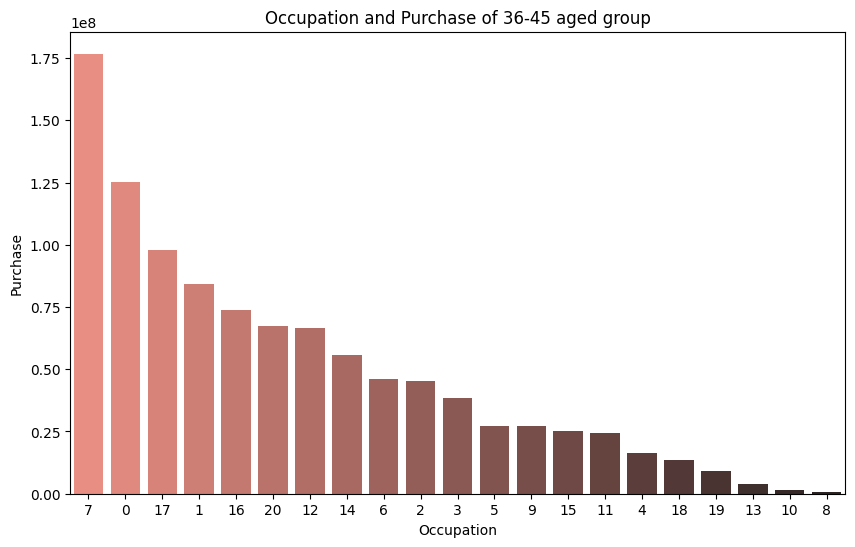

In [ ]:
cus_age_36_45 = df[df['Age'] == '36-45']
cus_36_45_group = cus_age_36_45.groupby('Occupation')['Purchase'].sum().reset_index()
cus_36_45_sorted = cus_36_45_group.sort_values('Purchase', ascending= False)
print(f'The occupation with the highest sales volume is {cus_36_45_sorted.iloc[0, 0]}')

# Plot the chart
plt.figure(figsize= (10,6))
sns.barplot(data= cus_36_45_sorted, x= 'Occupation', y= 'Purchase', palette= 'dark:salmon_r', order= cus_36_45_sorted['Occupation'])
plt.title('Occupation and Purchase of 36-45 aged group')
plt.show()

However, when analyzing the second group (aged 36-45), I found that Occupation 7 is the top occupation, not Occupation 0. This suggests that different age groups may have distinct target occupations for marketing advertising.



---



6. Which occupation spends the most money on purchases?

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

The occupation with the highest sales volume is 4


<ipython-input-47-f1604339ce2b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= occ_spend_sorted, x= 'Occupation', y= 'Purchase', palette= 'vlag', order= occ_spend_sorted['Occupation'])


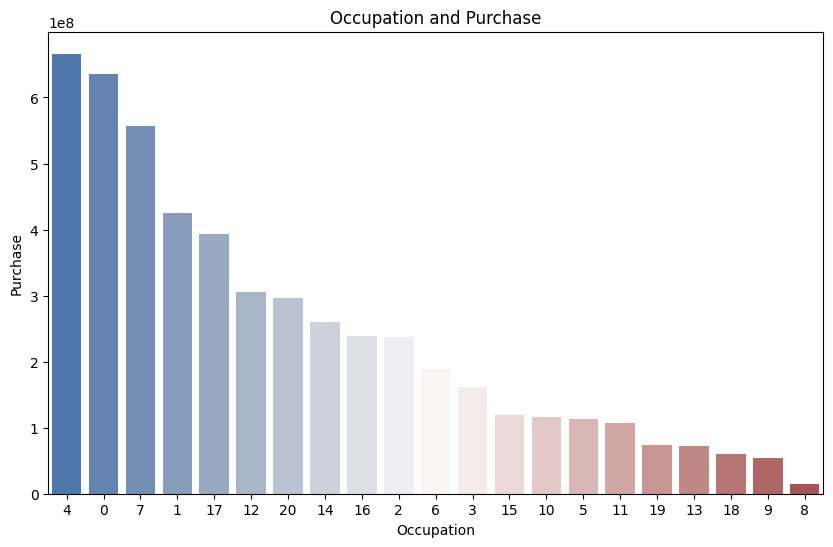

In [ ]:
occ_spend = df.groupby(['Occupation'])['Purchase'].sum().reset_index()
occ_spend_sorted = occ_spend.sort_values('Purchase', ascending= False)

print(f'The occupation with the highest sales volume is {occ_spend_sorted.iloc[0, 0]}')

# Plot the Chart
plt.figure(figsize= (10,6))
sns.barplot(data= occ_spend_sorted, x= 'Occupation', y= 'Purchase', palette= 'vlag', order= occ_spend_sorted['Occupation'])
plt.title('Occupation and Purchase')
plt.show()

Occupations 4, 0, and 7 spend the most on purchases at Walmart compared to other occupations.

The occupation "4" with the highest sales volume each aged range is 18-25
    Occupation    Age   Purchase
28           4  18-25  441579048
29           4  26-35  203823337
30           4  36-45   16447938
32           4  51-55    2324482
27           4   0-17    1065812
31           4  46-50    1003867


<ipython-input-82-e30545d0b30a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= occ_spend_sorted2, x= 'Age', y= 'Purchase', palette= 'vlag')


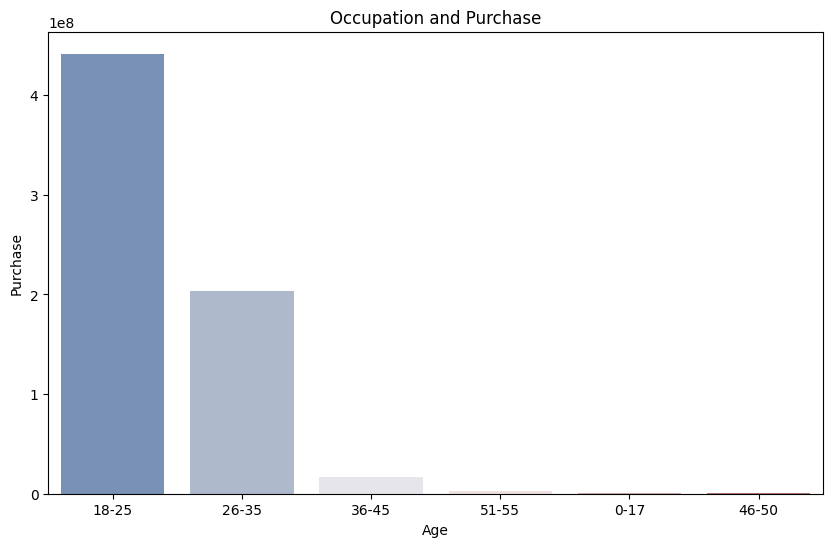

In [ ]:
occ_spend2 = df.groupby(['Occupation', 'Age'])['Purchase'].sum().reset_index()
occ_spend2_four = occ_spend2[occ_spend2['Occupation'] == 4]
occ_spend_sorted2 = occ_spend2_four.sort_values('Purchase', ascending= False)
print(f'The occupation "4" with the highest sales volume each aged range is {occ_spend_sorted2.iloc[0, 1]}')
print(occ_spend_sorted2)


# Plot the Chart
plt.figure(figsize= (10,6))
sns.barplot(data= occ_spend_sorted2, x= 'Age', y= 'Purchase', palette= 'vlag')
plt.title('Occupation and Purchase')
plt.show()

Therefore, Occupation 4 has the highest sales volume among customers aged 18-25.

<ipython-input-95-175e07983ccc>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= top_occ_purchase, x= 'Product_Category', y= 'Purchase', ci= None, palette= 'crest', order= top_occ_purchase.sort_values('Purchase', ascending= False)['Product_Category'])
<ipython-input-95-175e07983ccc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= top_occ_purchase, x= 'Product_Category', y= 'Purchase', ci= None, palette= 'crest', order= top_occ_purchase.sort_values('Purchase', ascending= False)['Product_Category'])


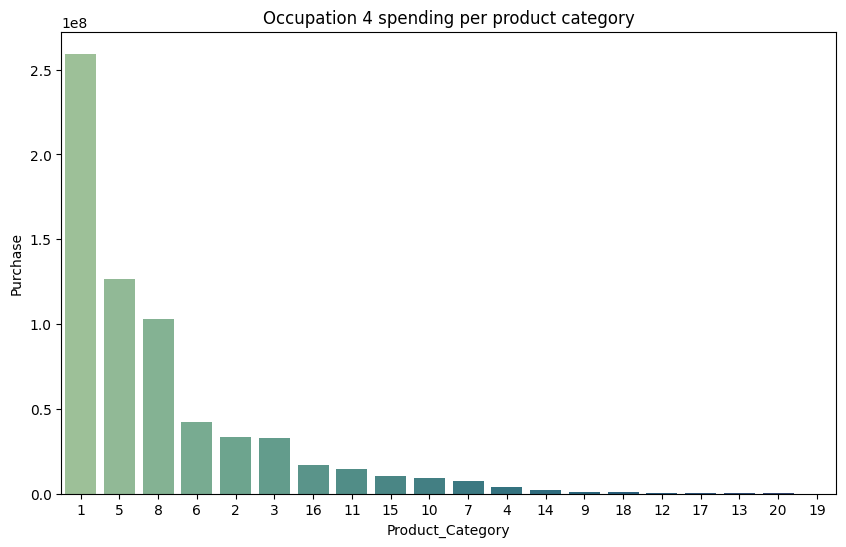

In [ ]:
# Group by ProductCategory and age, then sum purchases by selecting the Top occupation
df_occ_4 = df[df['Occupation'] == 4]
top_occ_purchase = df_occ_4.groupby(['Occupation', 'Product_Category'])['Purchase'].sum().reset_index()

# Plot the chart
plt.figure(figsize= (10,6))
sns.barplot(data= top_occ_purchase, x= 'Product_Category', y= 'Purchase', ci= None, palette= 'crest', order= top_occ_purchase.sort_values('Purchase', ascending= False)['Product_Category'])
plt.title('Occupation 4 spending per product category')
plt.show()

When driving in Occupation 4, the top product category is number 1, followed by numbers 5 and 8.



---



7. the top 20 users who spent the most on purchases at Walmart.

      User_ID  Purchase
4166  1004277  10536909
1634  1001680   8699596
2831  1002909   7577756
1885  1001941   6817493
416   1000424   6573609
4335  1004448   6566245
5683  1005831   6512433
981   1001015   6511314
3297  1003391   6477160
1142  1001181   6387961
534   1000549   6310723
3443  1003539   6187094
2951  1003032   6126540
3741  1003841   6044415
3520  1003618   5962012
1244  1001285   5805379
4232  1004344   5733683
3135  1003224   5673106
1051  1001088   5628655
1923  1001980   5549865
The total top user purchased is $10536909


<ipython-input-85-e2881784444b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= user_sorted,


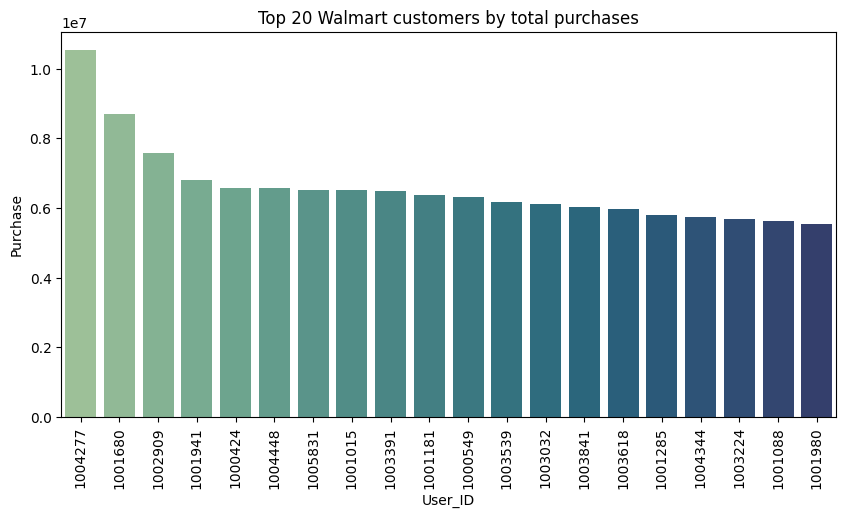

In [ ]:
user_purchase = df.groupby('User_ID')['Purchase'].sum().reset_index()
user_sorted = user_purchase.sort_values('Purchase', ascending=False).head(20)
print(user_sorted)
print(f'The total top user purchased is ${user_sorted.iloc[0,1]}')

plt.figure(figsize= (10,5))
sns.barplot(data= user_sorted,
            x='User_ID', y='Purchase', palette='crest', order=user_sorted['User_ID'])
plt.title('Top 20 Walmart customers by total purchases')
plt.xticks(rotation=90)
plt.show()

These are the top 20 users who spend the most on purchases at Walmart. The top spender has a purchase history of over 10 million, while the second-highest spender has a purchase history of around 8 million. Therefore, Walmart can offer promotions or rewards to these top users to maintain their long-term customer loyalty.



---



## **Conslusion**

***Customer gender and product***

Walmart's highest income comes from male customers, totaling $3,909,580,100.
    which is nearly three times that of female customers ($1,186,232,642).

However, when analyzing product categories, we find that the top three purchased items (products 1, 5, and 8) are equally popular among both genders. This suggests that while men spend more overall, both genders are likely buying similar essential products, such as daily necessities or food. Nevertheless, the significant spending difference between men and women remains intriguing and warrants further investigation. In addition, the best-selling products for males are P00025442, P0010742, and P00184942, while for females they are P00255842, P0059442, and P00110842. Conversely, it's quite surprising that the best-selling products among female customers are from product categories 16 (P00255842) and 6 (P00059442), rather than product category 1. This suggests that factors other than overall popularity influence female purchasing decisions. While product categories 1, 5, and 8 are generally popular among females, these specific products may have unique attributes or appeal that drive their higher sales

***City Category potential***

In terms of city category, I found that city category 'B' has high potential, with a significantly higher purchase volume than city categories 'C' and 'A'. Specifically, 'B' has almost twice the purchase volume of 'A'.  Moreover, City category 'B' has the highest frequency of purchasers, with category 1 being the most popular among all others, not just for city 'B' but across all city categories.

***Customer status***

Let's delve into the customer status. I found that most Walmart customers are single rather than married. Furthermore, after analyzing each city category, the results remain consistent: single customers have made more purchases than married ones. These findings are mutually reinforcing.

***Customer age range***

The age group of 26-35 is the most frequent Walmart customer, with males outspending females. Within this group, most male customers work in Occupation 0, while most female customers work in Occupation 7. These two occupations show potential as target markets. However, Occupation 4 has the highest overall purchase volume, suggesting it might be a target for a different age group.

So, I tried to analyze the second-highest purchasing group, which is customers aged 36-45. Surprisingly, occupational group number 4 is still not the top purchasing occupation in this age group, but it is occupation 7.

I delved into Occupation 4 to see which age group generates the most income. I found that Occupation 4 has the highest sales volume among customers aged 18-25 and their top product category is number 1, followed by numbers 5 and 8.

***Users analyst***

These are the top 20 users who spend the most on purchases at Walmart. The top spender has a purchase history of over 10 million, while the second-highest spender has a purchase history of around 8 million. Therefore, Walmart can offer promotions or rewards to these top users to maintain their long-term customer loyalty.